# Common functions

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

class Get_name():
    def __init__(self,sheet):
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name':'','real_name':''}
            array['exp_name'] = self.table.cell_value(rown,0)
            array['real_name'] = self.table.cell_value(rown,1)
            self.tables.append(array)
    def real_name(self,name):
        for i in range(len(self.tables)):
            if name.split('-')[0]==self.tables[i]['exp_name']: 
                return self.tables[i]['real_name']

def rename3(name):
    if name.split('-')[0][:5]=='tidig':return 'TIDigits'
    if name.split('-')[0][:5]=='mnist':return 'MNIST'
    if name.split('-')[0][:5]=='cifar':return 'Cifar-10'
    if name.split('-')[0][:5]=='dvsge':return 'DvsGesture'

def file_name(file_dir):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L
def read_data(f,n):
    x,y = [],[]
    for lin in range(n):
        if lin % ep == 0:
            x.append(float(f[lin].split(' ')[0]))
            y.append(float(f[lin].split(' ')[1])/100)
    return x,y
def mydata(filename,n):
    file = file_name(filename)
    xea,yea=[],[]
    flag = n
    n = []
    for i in file:
        f = open(i+'/testacc.txt','r')
        n.append(len(f.readlines()))
    n.append(flag)
    n = min(n)
    print(n)
    for i in file:
        f = open(i+'/testacc.txt','r')
        x1,y1=read_data(f.readlines(),n)
        xea.append(x1)
        yea.append(y1)
    return np.array(xea),np.array(yea)
def myplot1(name):
    file = file_name('./')
    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 14
    xta, yta, xea, yea, xtl, ytl, xel, yel = mydata(file, name)

    fig, ax1 = plt.subplots()
    l1, = ax1.plot(xta, yta, color='#4472AE', label='acc')
    ax1.set_ylabel('acc')
    ax1.set_ylim(0, 1)
    ax2 = ax1.twinx()
    l2, = ax2.plot(xtl, ytl, color='#E87F29', label='loss')
    ax2.set_ylabel('loss')
    ax2.set_ylim(0, 1)
    plt.legend(handles=[l1, l2], labels=['acc', 'loss'], loc='right', frameon=False, fontsize=14)
    plt.xlabel('epoch')
    plt.title('{} train'.format(rename(name)))
    plt.show()

    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 14

    fig, ax1 = plt.subplots()
    l1, = ax1.plot(xea, yea, color='#4472AE', label='acc')
    ax1.set_ylabel('acc')
    ax1.set_ylim(0, 1)
    ax2 = ax1.twinx()
    l2, = ax2.plot(xel, yel, color='#E87F29', label='loss')
    ax2.set_ylabel('loss')
    ax2.set_ylim(0, 1)
    plt.legend(handles=[l1, l2], labels=['acc', 'loss'], loc='right', frameon=False, fontsize=14)
    plt.xlabel('epoch')
    plt.title('{} test'.format(rename(name)))
    plt.show()

def myplot2(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 14
    fig, ax1 = plt.subplots()
    xta, yta, xea, yea, xtl, ytl, xel, yel = ['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n
    l, na=[], []
    ylabel='Acc'
    print('train')
    for i in range(n):
        xta[i], yta[i], xea[i], yea[i], xtl[i], ytl[i], xel[i], yel[i] = mydata(file,name1[i])
        if mode == 'Loss':
            xta[i],yta[i]=xtl[i],ytl[i]
            ylabel='Loss'
        a, = ax1.plot(xta[i], yta[i])
        
        print(name,rename(name1[i]),'epoch:',xta[i][xn],'Acc:{:.2f}%'.format(100*yta[i][xn]))
        l.append(a)
        na.append(rename(name1[i]))
    ax1.set_ylabel(ylabel,fontsize=16)
    ax1.set_ylim(ylim[0], ylim[1])
    ax1.set_xlim(xlim[0], xlim[1])
    plt.legend(handles=l, labels=na, loc=loc, frameon=True, fontsize=14)
    plt.xlabel('Epoch',fontsize=16)
    plt.title('{} Train'.format(name))
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

    file = file_name('./')
    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 14
    fig, ax1 = plt.subplots()
    xta, yta, xea, yea, xtl, ytl, xel, yel = ['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n
    l, na=[], []
    print('test')
    for i in range(n):
        xta[i], yta[i], xea[i], yea[i], xtl[i], ytl[i], xel[i], yel[i] = mydata(file,name1[i])
        if mode == 'Loss':
            xea[i],yea[i]=xel[i],yel[i]
            ylabel='Loss'
        a, = ax1.plot(xea[i], yea[i])
        
        print(name,rename(name1[i]),'epoch:',xea[i][xn],'Acc:{:.2f}%'.format(100*yea[i][xn]))
        l.append(a)
        na.append(rename(name1[i]))
    ax1.set_ylabel(ylabel,fontsize=16)
    ax1.set_ylim(ylim[0], ylim[1])
    ax1.set_xlim(xlim[0], xlim[1])
    plt.legend(handles=l, labels=na, loc=loc, frameon=True, fontsize=14)
    plt.xlabel('Epoch',fontsize=16)
    plt.title('{} Test'.format(name))
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

def myplot3(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    print(name1)
    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 14
    fig, ax1 = plt.subplots()
    xta, yta, xea, yea, xtl, ytl, xel, yel = ['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n,['']*n
    l, na=[], []
    ylabel='Accuracy'
    for i in range(n):
        xta[i], yta[i], xea[i], yea[i], xtl[i], ytl[i], xel[i], yel[i] = mydata(file,name1[i])
        print(len(xta))
        if mode == 'Loss':
            xta[i],yta[i]=xtl[i],ytl[i]
            ylabel='Loss'
        a, = ax1.plot(xta[i], yta[i])
        l.append(a)
        na.append(rename3(name1[i])+' Train')
        a, = ax1.plot(xea[i], yea[i])
        l.append(a)
        na.append(rename3(name1[i])+' Test')
        print(name,rename3(name1[i]),'epoch:',xea[i][xn],'Acc:{:.2f}%'.format(100*yea[i][xn]))
    ax1.set_ylabel(ylabel,fontsize=16)
    ax1.set_ylim(ylim[0], ylim[1])
    ax1.set_xlim(xlim[0], xlim[1])
    plt.legend(handles=l, labels=na, loc=loc, frameon=False, fontsize=14)
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name))
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.show()
    return fig
rename=Get_name(0)

In [2]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
def myplot4(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./data/')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    ylabel='Accuracy (test set)'
    plt.rcParams['font.family'] = 'Calibri'
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        try:
            ax.plot(xea.mean(axis=0), yea.mean(axis=0), color=colors[i],label=rename5.real_name(name1[i]))
        except:
            print(name1[i])
        print(yea.mean(axis=0).max(), name1[i])
        print(np.where(yea.mean(axis=0)==yea.mean(axis=0).max()))
        ax.fill_between(xea.mean(axis=0), (yea.mean(axis=0) -  1* yea.std(axis=0)), (yea.mean(axis=0) + 1 * yea.std(axis=0)),color=colors[i],alpha=.1)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], xlim[1])
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name),fontsize=16)
    plt.legend(loc=loc, frameon=False, fontsize=16,ncol=1)
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.show()
    return fig

rename5=Get_name(1)
ep = 1
xn = -1

# MNIST

200
0.9768803036875194 tidigits_conv3 [0.00106509]
(array([199], dtype=int64),)


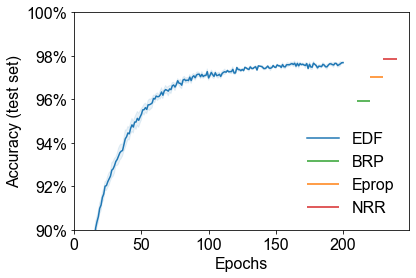

In [43]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
def myplot4(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./data/')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    ylabel='Accuracy (test set)'
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        try:
            ax.plot(xea.mean(axis=0), yea.mean(axis=0), color=colors[i],label=rename5.real_name(name1[i]))
        except:
            print(name1[i])
        print(yea.mean(axis=0).max(), name1[i], yea.std(axis=0)[np.where(yea.mean(axis=0)==yea.mean(axis=0).max())])
        print(np.where(yea.mean(axis=0)==yea.mean(axis=0).max()))
        ax.fill_between(xea.mean(axis=0), (yea.mean(axis=0) -  0.5* yea.std(axis=0)), (yea.mean(axis=0) + 0.5 * yea.std(axis=0)),color=colors[i],alpha=.1)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], 249)
    plt.hlines(0.9594, 210, 220, colors='C2', linestyles='-',label='BRP')
    plt.hlines(0.9704, 220, 230, colors='C1', linestyles='-',label='Eprop')
    plt.hlines(0.9787, 230, 240, colors='C3', linestyles='-',label='NRR') 
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name),fontsize=16)
    plt.legend(loc=loc, frameon=False, fontsize=16,ncol=1)
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    return fig

rename5=Get_name(1)
ep = 1
xn = -1

rename5=Get_name(0)
myplot4('',[0.9,1],[0,200],'Acc','lower right','tidigits_conv3').savefig('E:\Study\Data\essaycode\RP\图/TID.svg')

# TIDigits

In [41]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
def myplot4(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./data/')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    ylabel='Accuracy (test set)'
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        try:
            ax.plot(xea.mean(axis=0), yea.mean(axis=0), color=colors[i],label=rename5.real_name(name1[i]))
        except:
            print(name1[i])
        print(yea.mean(axis=0).max(), name1[i], yea.std(axis=0)[np.where(yea.mean(axis=0)==yea.mean(axis=0).max())])
        print(np.where(yea.mean(axis=0)==yea.mean(axis=0).max()))
        ax.fill_between(xea.mean(axis=0), (yea.mean(axis=0) -  1* yea.std(axis=0)), (yea.mean(axis=0) + 1 * yea.std(axis=0)),color=colors[i],alpha=.1)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], 124)
    
    plt.hlines(0.9763, 105, 110, colors='C2', linestyles='-',label='Eprop') 
    plt.hlines(0.9855, 110, 115, colors='C1', linestyles='-',label='NRR') 
    plt.hlines(0.9884, 115, 120, colors='C3', linestyles='-',label='BRP') 
    
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name),fontsize=16)
    plt.legend(loc=loc, frameon=False, fontsize=16,ncol= 1)
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.show()
    return fig

rename5=Get_name(1)
ep = 1
xn = -1

100
0.9902333333333333 MNIST_PM2 [0.00063421]
(array([82], dtype=int64),)


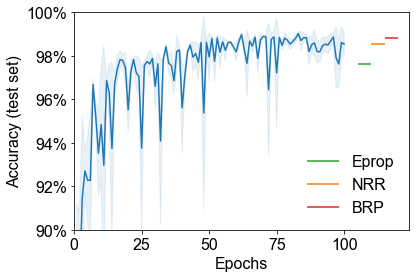

In [42]:
rename5=Get_name(1)
ep = 1
xn = -1
myplot4('',[0.9,1],[0,100],'Acc','lower right','MNIST_PM2').savefig('E:\Study\Data\essaycode\RP\图/MNIST.svg')#,'MNIST_RP_None'
plt.show()

# different distributions

100
0.9845785653591156 MNIST_11U [0.00048571]
(array([95], dtype=int64),)
100
0.9854749938845635 MNIST_11N [0.00017857]
(array([94], dtype=int64),)
100
0.9846285644173622 Beta_05_05_1 [8.57117772e-05]
(array([99], dtype=int64),)


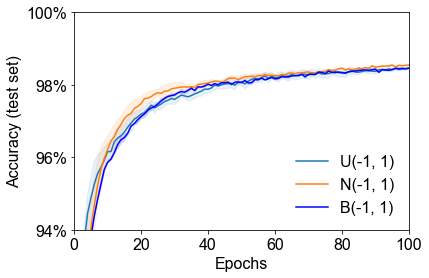

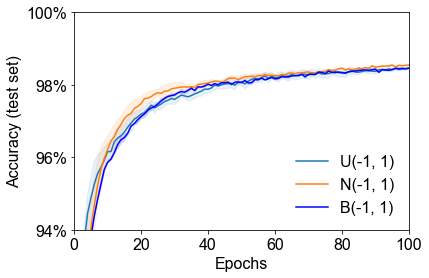

In [4]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
def myplot4(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./data/')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    ylabel='Accuracy (test set)'
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        try:
            ax.plot(xea.mean(axis=0), yea.mean(axis=0), color=colors[i],label=rename5.real_name(name1[i]))
        except:
            print(name1[i])
        print(yea.mean(axis=0).max(), name1[i], yea.std(axis=0)[np.where(yea.mean(axis=0)==yea.mean(axis=0).max())])
        print(np.where(yea.mean(axis=0)==yea.mean(axis=0).max()))
        ax.fill_between(xea.mean(axis=0), (yea.mean(axis=0) -  1* yea.std(axis=0)), (yea.mean(axis=0) + 1 * yea.std(axis=0)),color=colors[i],alpha=.1)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], xlim[1])
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name),fontsize=16)
    plt.legend(loc=loc, frameon=False, fontsize=16,ncol=1)
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.show()
    return fig

rename5=Get_name(1)
ep = 1
xn = -1

rename5=Get_name(1)
myplot4('',[0.94,1],[0,100],'Acc','lower right','MNIST_11U','MNIST_11N','Beta_05_05_1')

# different rank (Linear graph)

100
0.9829892790317536 MNIST_Rank9 [0.00097857]
100
0.9439749896526337 MNIST_Rank7 [0.01123928]
100
0.9265303477644921 MNIST_Rank5 [0.01365536]
100
0.7566946351528168 MNIST_Rank3 [0.04574107]
100
0.11349999874830247 MNIST_Rank1 [0.]


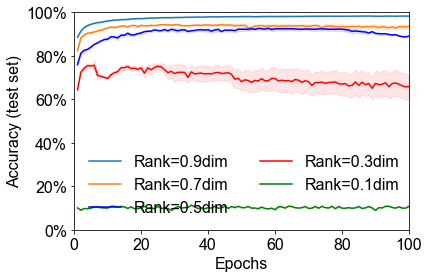

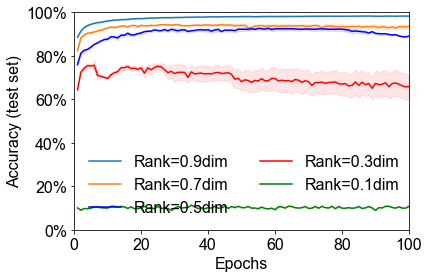

In [5]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
def myplot4(name,ylim,xlim,mode,loc,*arg):
    file = file_name('./data/')
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    ylabel='Accuracy (test set)'
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        try:
            ax.plot(xea.mean(axis=0), yea.mean(axis=0), color=colors[i],label=rename5.real_name(name1[i]))
        except:
            print(name1[i])
        print(yea.mean(axis=0).max(), name1[i], yea.std(axis=0)[np.where(yea.mean(axis=0)==yea.mean(axis=0).max())])
        ax.fill_between(xea.mean(axis=0), (yea.mean(axis=0) -  0.5* yea.std(axis=0)), (yea.mean(axis=0) + 0.5 * yea.std(axis=0)),color=colors[i],alpha=.1)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], xlim[1])
    plt.xlabel('Epochs',fontsize=16)
    plt.title('{}'.format(name),fontsize=16)
    plt.legend(loc=loc, frameon=False, fontsize=16,ncol=2)
    if mode == 'Acc':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.show()
    return fig

rename5=Get_name(1)
ep = 1
xn = -1

myplot4('',[0,1],[0,100],'Acc','lower left','MNIST_Rank9','MNIST_Rank7','MNIST_Rank5','MNIST_Rank3','MNIST_Rank1')

# different range (Linear graph)

52
0.9836892771720886 MNIST_Uni100
(array([49], dtype=int64),)
52
0.9819785648584366 MNIST_Uni095
(array([50], dtype=int64),)
53
0.9811571371555329 MNIST_Uni090
(array([50], dtype=int64),)
100
0.9850535672903061 MNIST_Uni085
(array([97], dtype=int64),)
100
0.9847107082605362 MNIST_Uni080
(array([96], dtype=int64),)
100
0.9857249939441681 MNIST_Uni075
(array([95], dtype=int64),)
100
0.9845964235067367 MNIST_Uni070
(array([98], dtype=int64),)
100
0.9840428513288498 MNIST_Uni065
(array([98], dtype=int64),)
100
0.9840392780303955 MNIST_Uni060
(array([94], dtype=int64),)
100
0.9849642765522003 MNIST_Uni055
(array([92], dtype=int64),)


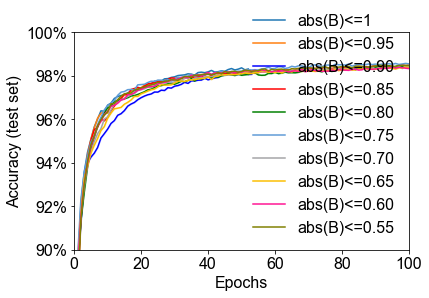

100
0.9853499978780746 MNIST_Uni050
(array([97], dtype=int64),)
100
0.9835249972343445 MNIST_Uni045
(array([98], dtype=int64),)
100
0.9845392799377441 MNIST_Uni040
(array([98], dtype=int64),)
100
0.9839749938249588 MNIST_Uni035
(array([98], dtype=int64),)
100
0.9844392794370651 MNIST_Uni030
(array([96], dtype=int64),)
75
0.9848321354389191 MNIST_Uni025
(array([74], dtype=int64),)
51
0.9810392785072327 MNIST_Uni020
(array([49], dtype=int64),)
79
0.9849107092618943 MNIST_Uni015
(array([77], dtype=int64),)
82
0.9849821352958679 MNIST_Uni010
(array([79], dtype=int64),)
59
0.9815714246034623 MNIST_Uni005
(array([57], dtype=int64),)


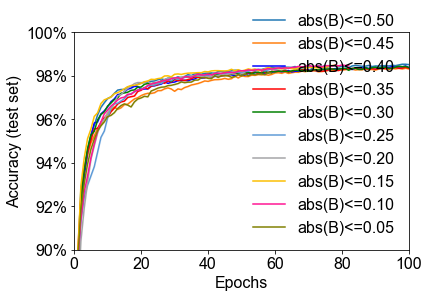

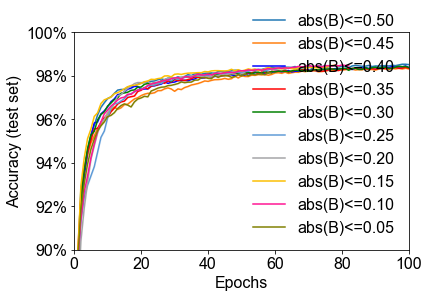

In [19]:
rename5=Get_name(1)
myplot4('',[0.9,1],[0,100],'Acc','lower right','MNIST_Uni100','MNIST_Uni095','MNIST_Uni090','MNIST_Uni085','MNIST_Uni080','MNIST_Uni075','MNIST_Uni070','MNIST_Uni065','MNIST_Uni060','MNIST_Uni055')
myplot4('',[0.9,1],[0,100],'Acc','lower right','MNIST_Uni050','MNIST_Uni045','MNIST_Uni040','MNIST_Uni035','MNIST_Uni030','MNIST_Uni025','MNIST_Uni020','MNIST_Uni015','MNIST_Uni010','MNIST_Uni005')

# different mean (Linear graph)

50
0.11349999874830247 MNIST_Scan000
(array([ 2, 10, 14, 16, 19, 22, 26, 30, 33, 36, 37, 47], dtype=int64),)
50
0.11349999874830247 MNIST_Scan010
(array([ 2,  6, 24, 31, 37, 47], dtype=int64),)
50
0.11349999874830247 MNIST_Scan020
(array([13, 23, 32, 42, 43, 44], dtype=int64),)
50
0.11349999874830247 MNIST_Scan030
(array([20, 23, 25, 43, 49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan040
(array([17, 27, 36, 37, 40, 48, 49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan050
(array([ 2, 14, 22, 24, 33, 34, 38, 39, 41, 48], dtype=int64),)
50
0.8138464200496673 MNIST_Scan060
(array([4], dtype=int64),)
50
0.8820607060194016 MNIST_Scan070
(array([3], dtype=int64),)
50
0.11349999874830247 MNIST_Scan080
(array([3, 4], dtype=int64),)


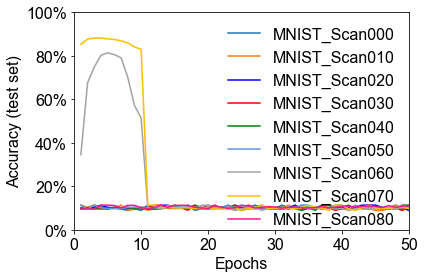

50
0.11349999874830247 MNIST_Scan090
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan100
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan110
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan120
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 

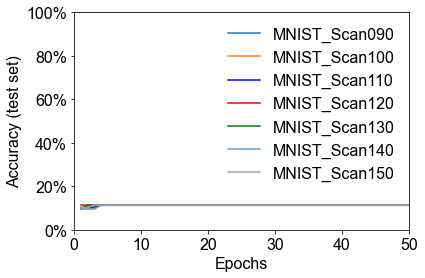

50
0.8842249917984009 MNIST_Scan071
(array([2], dtype=int64),)
50
0.8875857013463974 MNIST_Scan072
(array([2], dtype=int64),)
50
0.88886070728302 MNIST_Scan073
(array([2], dtype=int64),)
50
0.8906678491830826 MNIST_Scan074
(array([2], dtype=int64),)
50
0.980457136631012 MNIST_Scan075
(array([47], dtype=int64),)
50
0.9575785619020462 MNIST_Scan076
(array([49], dtype=int64),)
50
0.11349999874830247 MNIST_Scan077
(array([2, 3, 4], dtype=int64),)
50
0.11349999874830247 MNIST_Scan078
(array([2, 3, 4], dtype=int64),)
50
0.11349999874830247 MNIST_Scan079
(array([1, 2, 3, 4], dtype=int64),)


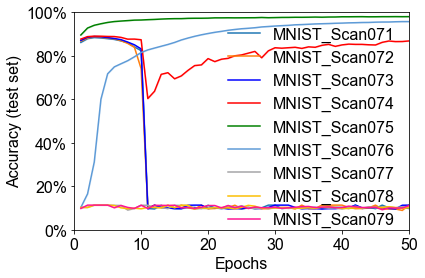

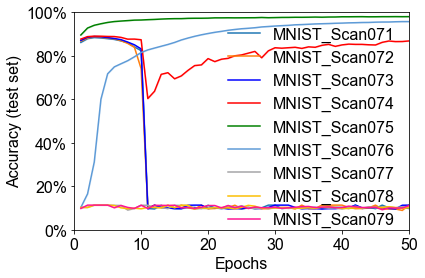

In [13]:
rename5=Get_name(1)
ep = 1
xn = -1
myplot4('',[0,1],[0,50],'Acc','upper right','MNIST_Scan000','MNIST_Scan010','MNIST_Scan020','MNIST_Scan030','MNIST_Scan040','MNIST_Scan050','MNIST_Scan060','MNIST_Scan070','MNIST_Scan080')
myplot4('',[0,1],[0,50],'Acc','upper right','MNIST_Scan090','MNIST_Scan100','MNIST_Scan110','MNIST_Scan120','MNIST_Scan130','MNIST_Scan140','MNIST_Scan150')
myplot4('',[0,1],[0,50],'Acc','upper right','MNIST_Scan071','MNIST_Scan072','MNIST_Scan073','MNIST_Scan074','MNIST_Scan075','MNIST_Scan076','MNIST_Scan077','MNIST_Scan078','MNIST_Scan079')

# different range (Bar graph)

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
98.21%,98.18%,98.00%,98.17%,98.12%,98.29%,98.17%,98.14%,98.28%,98.13%,98.22%,98.15%,97.98%,98.22%,98.19%,98.05%,98.13%,98.25%,98.23%,98.12%,--------------------
0.16%,0.02%,0.10%,0.06%,0.04%,0.07%,0.01%,0.08%,0.12%,0.08%,0.04%,0.15%,0.06%,0.12%,0.09%,0.11%,0.02%,0.05%,0.00%,0.05%,
0.75 0.40
0.9828749933838845 0.0007321432232856862
0.9797642779350281 0.0006249999999999867


Text(0.5, 0, 'Width of uniform distribution for the matrix B value')

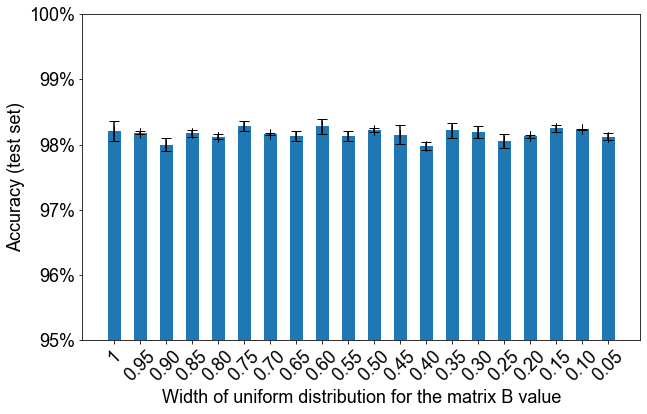

In [36]:
SNNSpar=[]
def report_data(name,ylim,xlim,mode,loc,*arg):
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        ymean=yea.mean(axis=0)
        ystd=yea.std(axis=0)
        arr={'label':'','name':'','ymean':'','ystd':''}
        arr['label']=rename5.real_name(name1[i])
        arr['name']=name
        arr['ymean']=ymean.max()
        arr['ystd']=ystd[np.argmax(ymean)]
        SNNSpar.append(arr)
ep = 1
xn = -1
rename5=Get_name(1)

report_data('a',[0,1],[0,50],'Acc','lower right','MNIST_Uni100','MNIST_Uni095','MNIST_Uni090','MNIST_Uni085','MNIST_Uni080','MNIST_Uni075','MNIST_Uni070','MNIST_Uni065','MNIST_Uni060','MNIST_Uni055','MNIST_Uni050','MNIST_Uni045','MNIST_Uni040','MNIST_Uni035','MNIST_Uni030','MNIST_Uni025','MNIST_Uni020','MNIST_Uni015','MNIST_Uni010','MNIST_Uni005')
X, xbar, y= [], [], []
for i in range(len(SNNSpar)):
    X.append(SNNSpar[i]['ymean'])
    xbar.append(SNNSpar[i]['ystd'])
    y.append(SNNSpar[i]['label'])
X = X
y = y

movie_name = []
for i in range(len(X)):
    movie_name.append(y[i].split('=')[1])

x = np.arange(len(X))
colors = ['#1F77B4','#FF7F0E','#2CA02C','g','b','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
ax.bar(x, X,width=0.5, color=colors[0])
plt.errorbar(x,X, fmt=" ", yerr=xbar, xerr=0, capsize=5,color='black')
for i in range(len(X)):
    print('{:.2f}%,'.format(X[i]*100),end='')
print('-'*20)
for i in range(len(X)):
    print('{:.2f}%,'.format(xbar[i]*100),end='')
max1 = int(np.where(X==max(X))[0])
min1 = int(np.where(X==min(X))[0])
print('')
print(movie_name[max1], movie_name[min1])
print(X[max1],xbar[max1])
print(X[min1],xbar[min1])
plt.xticks(np.arange(len(SNNSpar)), movie_name, rotation=45, fontsize=18)
plt.yticks(fontsize=18)
# # ax.bar(x+0.1, ratiodrtp, width=0.2,label=movie_name[0],color=colors[1])
# # plt.errorbar(x+0.2,t1[i], fmt=" ", yerr=RFCstd[i], xerr=0, capsize=5,color='black')
# # ax1.plot(x1,ratiodnn, label='DNN')
# # ax1.plot(x2,ratiodrtp, label='DRTP')
# # ax1.set_ylabel('Accuracy (test set)',fontsize=16)
ax.set_ylim(0.95, 1)
# # ax1.set_xlim(xlim[0], xlim[1])
# # plt.xticks([i for i in range(6)],[i/10 for i in range(6)])
# plt.ylabel('Ratio',fontsize=16)
# plt.xlabel('Proportion of noise',fontsize=16)
# plt.title('Tidigits',fontsize=16)
# plt.legend(loc='upper right', frameon=False, fontsize=14)
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylabel('Accuracy (test set)',fontsize=18)
plt.xlabel('Width of uniform distribution for the matrix B value',fontsize=18)
# plt.savefig('E:\Study\Data\essaycode\RP\图/MNIST_Width.svg')

# different mean (Bar graph)

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
11.35%,11.32%,11.35%,11.33%,11.35%,11.35%,82.09%,88.23%,11.35%,11.35%,11.35%,11.35%,11.35%,11.35%,11.35%,11.35%,--------------------
0.00%,0.03%,0.00%,0.02%,0.00%,0.00%,0.70%,0.02%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,

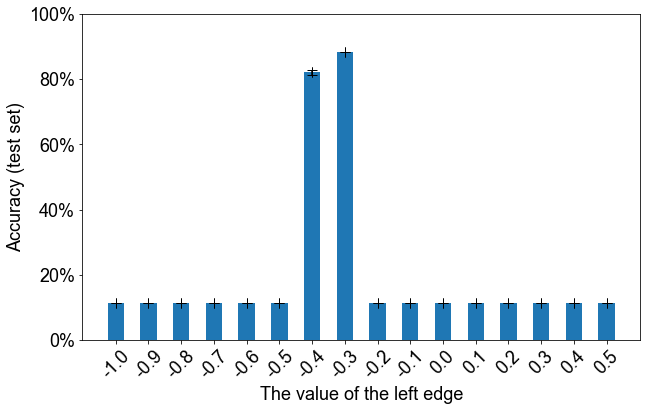

In [12]:
SNNSpar=[]
def report_data(name,ylim,xlim,mode,loc,*arg):
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        ymean=yea.mean(axis=0)
        ystd=yea.std(axis=0)
        arr={'label':'','name':'','ymean':'','ystd':''}
        arr['label']=rename5.real_name(name1[i])
        arr['name']=name
        arr['ymean']=ymean.max()
        arr['ystd']=ystd[np.argmax(ymean)]
        SNNSpar.append(arr)
ep = 1
xn = -1
rename5=Get_name(1)

report_data('a',[0,1],[0,50],'Acc','lower right','MNIST_Scan000','MNIST_Scan010','MNIST_Scan020','MNIST_Scan030','MNIST_Scan040','MNIST_Scan050','MNIST_Scan060','MNIST_Scan070','MNIST_Scan080','MNIST_Scan090','MNIST_Scan100','MNIST_Scan110','MNIST_Scan120','MNIST_Scan130','MNIST_Scan140','MNIST_Scan150')
# report_data('a',[0,1],[0,50],'Acc','lower right','MNIST_Scan071','MNIST_Scan072','MNIST_Scan073','MNIST_Scan074','MNIST_Scan075','MNIST_Scan076','MNIST_Scan077','MNIST_Scan078','MNIST_Scan079')

# print(SNNSpar)
X, xbar, y= [], [], []
for i in range(len(SNNSpar)):
    X.append(SNNSpar[i]['ymean'])
    xbar.append(SNNSpar[i]['ystd'])
    y.append(SNNSpar[i]['label'])
X = X
y = y

movie_name = []
for i in range(len(X)):
    a = y[i].split('n')[1]
    a = int(a)/100 - 1
    a = str('{:.1f}'.format(a))
    movie_name.append(a)
# 先得到movie_name长度, 再得到下标组成列表

x = np.arange(len(X))
colors = ['#1F77B4','#FF7F0E','#2CA02C','g','b','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
ax.bar(x, X,width=0.5, color=colors[0])
# print(xbar)
plt.errorbar(x,X, fmt=" ", yerr=xbar, xerr=0, capsize=5,color='black')
for i in range(len(X)):
    print('{:.2f}%,'.format(X[i]*100),end='')
print('-'*20)
for i in range(len(X)):
    print('{:.2f}%,'.format(xbar[i]*100),end='')
plt.xticks(np.arange(len(SNNSpar)), movie_name, rotation=45, fontsize=18)
plt.yticks(fontsize=18)
# # ax.bar(x+0.1, ratiodrtp, width=0.2,label=movie_name[0],color=colors[1])
# # plt.errorbar(x+0.2,t1[i], fmt=" ", yerr=RFCstd[i], xerr=0, capsize=5,color='black')
# # ax1.plot(x1,ratiodnn, label='DNN')
# # ax1.plot(x2,ratiodrtp, label='DRTP')
# # ax1.set_ylabel('Accuracy (test set)',fontsize=16)
ax.set_ylim(0, 1)
# # ax1.set_xlim(xlim[0], xlim[1])
# # plt.xticks([i for i in range(6)],[i/10 for i in range(6)])
# plt.ylabel('Ratio',fontsize=16)
# plt.xlabel('Proportion of noise',fontsize=16)
# plt.title('Tidigits',fontsize=16)
# plt.legend(loc='upper right', frameon=False, fontsize=14)
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylabel('Accuracy (test set)',fontsize=18)
plt.xlabel('The value of the left edge',fontsize=18)
plt.savefig('E:\Study\Data\essaycode\RP\图/MNIST_Scan.svg')

50
50
50
50
50
50
50
50
50
50
50
88.23%,88.50%,88.64%,88.88%,89.29%,98.00%,94.84%,11.35%,11.35%,11.35%,11.35%,--------------------
0.02%,0.08%,0.12%,0.01%,0.25%,0.01%,0.92%,0.00%,0.00%,0.00%,0.00%,

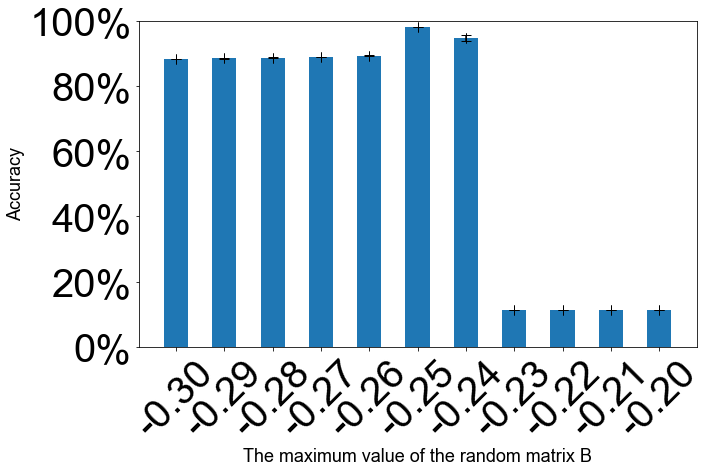

In [13]:
SNNSpar=[]
def report_data(name,ylim,xlim,mode,loc,*arg):
    name1 =list(locals()['arg'])[:]
    n=len(name1)
    for i in range(n):
        xea,yea = mydata('data/'+name1[i],xlim[1])
        ymean=yea.mean(axis=0)
        ystd=yea.std(axis=0)
        arr={'label':'','name':'','ymean':'','ystd':''}
        arr['label']=rename5.real_name(name1[i])
        arr['name']=name
        arr['ymean']=ymean.max()
        arr['ystd']=ystd[np.argmax(ymean)]
        SNNSpar.append(arr)
ep = 1
xn = -1
rename5=Get_name(1)
report_data('a',[0,1],[0,50],'Acc','lower right','MNIST_Scan070','MNIST_Scan071','MNIST_Scan072','MNIST_Scan073','MNIST_Scan074','MNIST_Scan075','MNIST_Scan076','MNIST_Scan077','MNIST_Scan078','MNIST_Scan079','MNIST_Scan080')

# print(SNNSpar)
X, xbar, y= [], [], []
for i in range(len(SNNSpar)):
    X.append(SNNSpar[i]['ymean'])
    xbar.append(SNNSpar[i]['ystd'])
    y.append(SNNSpar[i]['label'])
X = X
y = y

movie_name = []
for i in range(len(X)):
    a = y[i].split('n')[1]
    a = int(a)/100 - 1
    a = str('{:.2f}'.format(a))
    movie_name.append(a)
# 先得到movie_name长度, 再得到下标组成列表

x = np.arange(len(X))
colors = ['#1F77B4','#FF7F0E','#2CA02C','g','b','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 14
ax.bar(x, X,width=0.5, color=colors[0])
# print(xbar)
plt.errorbar(x,X, fmt=" ", yerr=xbar, xerr=0, capsize=5,color='black')
for i in range(len(X)):
    print('{:.2f}%,'.format(X[i]*100),end='')
print('-'*20)
for i in range(len(X)):
    print('{:.2f}%,'.format(xbar[i]*100),end='')
plt.xticks(np.arange(len(SNNSpar)), movie_name, rotation=45, fontsize=40)
plt.yticks(fontsize=40)
# # ax.bar(x+0.1, ratiodrtp, width=0.2,label=movie_name[0],color=colors[1])
# # plt.errorbar(x+0.2,t1[i], fmt=" ", yerr=RFCstd[i], xerr=0, capsize=5,color='black')
# # ax1.plot(x1,ratiodnn, label='DNN')
# # ax1.plot(x2,ratiodrtp, label='DRTP')
# # ax1.set_ylabel('Accuracy (test set)',fontsize=16)
ax.set_ylim(0, 1)
# # ax1.set_xlim(xlim[0], xlim[1])
# # plt.xticks([i for i in range(6)],[i/10 for i in range(6)])
# plt.ylabel('Ratio',fontsize=16)
# plt.xlabel('Proportion of noise',fontsize=16)
# plt.title('Tidigits',fontsize=16)
# plt.legend(loc='upper right', frameon=False, fontsize=14)
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('The maximum value of the random matrix B',fontsize=18)
plt.savefig('E:\Study\Data\essaycode\RP\图/MNIST_Scan1.svg')

# illustrate

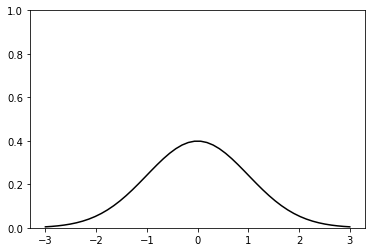

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
 
#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
mu1 = 0
sigma = 1

x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 50)
y_sig1 = normfun(x1,mu1,sigma)
plt.plot(x1, y_sig1, "k-")
plt.ylim([0,1])
# plt.yticks(())
plt.grid(False)
plt.savefig('E:\Study\Data\essaycode\RP\图/MNIST_Norm.svg')
plt.show()